# Image Enhancement

In [2]:
import cv2
import os
from matplotlib import pyplot as plt

dataDir = 'Images_01' # Change this, according to your images' directory path

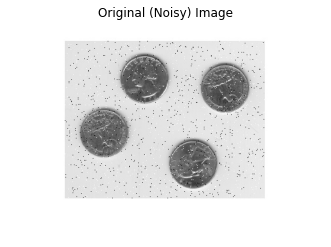

In [3]:
# Opening a noisy image
img = cv2.imread(os.path.join(dataDir, 'coins_03_noisy.jpg')) # Change this, according to your image's path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert from BGR to RGB because we are using matplotlib to display the image
plt.imshow(img)
plt.title('Original (Noisy) Image')
plt.axis('off')
plt.show()

## Filtering and Smoothing

[Mean Filter (Option 1)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

[Mean Filter (Option 2)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3)

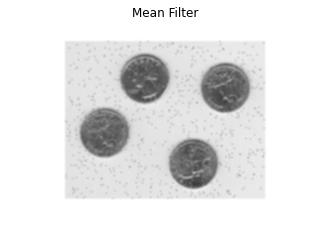

In [4]:
# Using a Mean Filter (Option 1)
imgWithMeanFilter = cv2.blur(img, (4,4))

plt.imshow(imgWithMeanFilter)
plt.title('Mean Filter')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


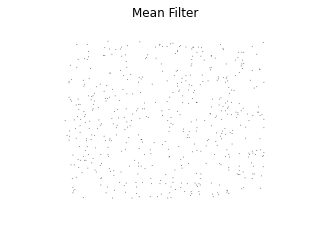

In [10]:
imgWithMeanFilter = cv2.boxFilter(img, cv2.CV_32F, (1,1))

plt.imshow(imgWithMeanFilter)
plt.title('Mean Filter')
plt.axis('off')
plt.show()

[Gaussian Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

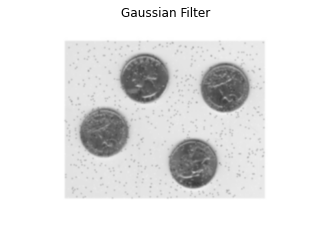

In [11]:
# Using a Gaussian Filter
imgWithGaussianFilter = cv2.GaussianBlur(img, (5,5), 0)

plt.imshow(imgWithGaussianFilter)
plt.title('Gaussian Filter')
plt.axis('off')
plt.show()

[Median Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

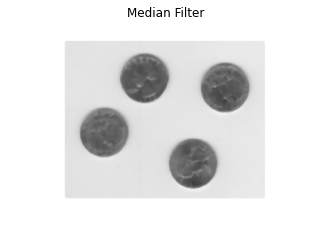

In [12]:
# Using a Median Filter
imgWithMedianFilter = cv2.medianBlur(img, 5)

plt.imshow(imgWithMedianFilter)
plt.title('Median Filter')
plt.axis('off')
plt.show()

[Bilateral Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)

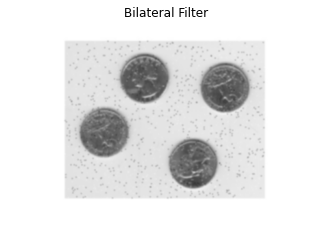

In [13]:
# Using a Bilateral Filter
imgWithBilateralFilter = cv2.bilateralFilter(img, 15, 75, 75)

plt.imshow(imgWithGaussianFilter)
plt.title('Bilateral Filter')
plt.axis('off')
plt.show()

**Challenge**

1. Download an image (colour or grayscale) of your choosing;

2. Apply salt and pepper noise to it;

3. Try smoothing the image with some of the presentented techniques;

4. Explore filtering with convolutions --- see exercise 4.e) of the exercises sheet.

In [15]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cv2 import cv2
from scipy import ndimage
# Read image
datadir = 'Images_01' # to c omplete
img = cv2.imread(os .path.join(datadir,'coins_03_noisy.jpg')) # to be c hanged
# C onvert to grays c ale if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Smooth us ing O penC V Gaus s ianBlur()
gaussianBlurred = cv2.GaussianBlur(img, (3 ,3 ), 0 )
# Smooth us ing c onvolution operation c oded below
kernel_3x3 = (1/16)* np.array([[1 , 2 , 1 ],[1 , 4 , 1 ],[1 , 2 , 1 ]])
print(kernel_3x3 )
myConvolutionResult = ndimage.convolve(img, kernel_3x3 )
# Show res ults
cv2.imshow("Original" , img)
cv2.imshow("OpenCV Gaussian Blur" , gaussianBlurred)
cv2.imshow("My 3x3 convolution w/Gaussian mask" , myConvolutionResult)
cv2.waitKey(0 )
cv2.destroyAllWindows ()

[[0.0625 0.125  0.0625]
 [0.0625 0.25   0.0625]
 [0.0625 0.125  0.0625]]


## Histogram Equalization

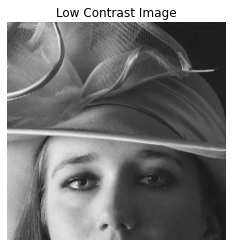

In [21]:
imgLC = cv2.imread(os.path.join(dataDir, 'face_lowContrast_01.jpg'), 0) # Change this, according to your image's path

plt.imshow(imgLC, cmap="gray")
plt.title('Low Contrast Image')
plt.axis('off')
plt.show()


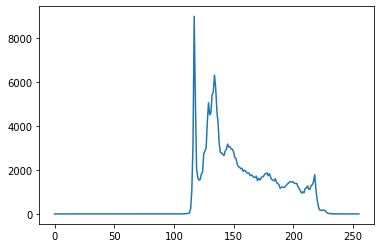

In [24]:
histg = cv2.calcHist([imgLC],[0],None,[256],[0,256]) 

plt.plot(histg)
plt.show()

[Histograms Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

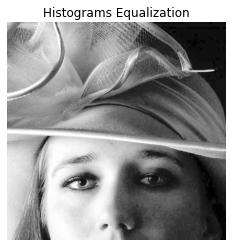

In [25]:
# Increasing Contrast with Histograms Equalization
imgLCwithHE = cv2.equalizeHist(imgLC)

plt.imshow(imgLCwithHE, cmap="gray")
plt.title('Histograms Equalization')
plt.axis('off')
plt.show()

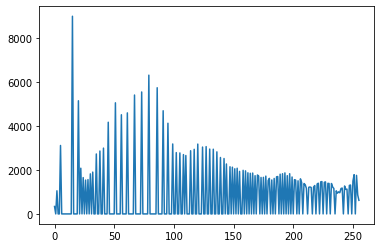

In [26]:
histg = cv2.calcHist([imgLCwithHE],[0],None,[256],[0,256]) 

plt.plot(histg)
plt.show()

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)

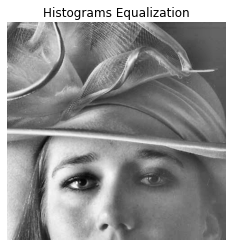

In [27]:
# Increasing Contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgLCwithCLAHE = clahe.apply(imgLC)

plt.imshow(imgLCwithCLAHE, cmap="gray")
plt.title('Histograms Equalization')
plt.axis('off')
plt.show()

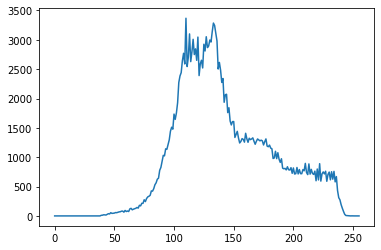

In [28]:
histg = cv2.calcHist([imgLCwithCLAHE],[0],None,[256],[0,256]) 

plt.plot(histg)
plt.show()

Challenge: Repeat the process for a coloured image

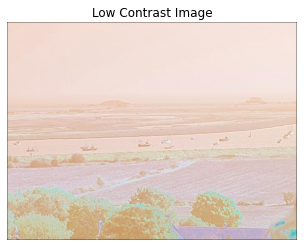

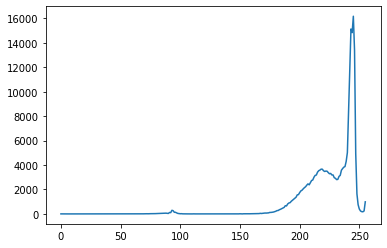

In [33]:
imgLC = cv2.imread(os.path.join(dataDir, 'lowContrast_06.jpg')) # Change this, according to your image's path
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(imgLC)
plt.title('Low Contrast Image')
plt.axis('off')
plt.show()

histg = cv2.calcHist([imgLC],[0],None,[256],[0,256]) 

plt.plot(histg)
plt.show()

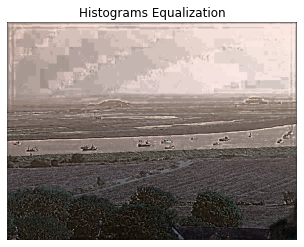

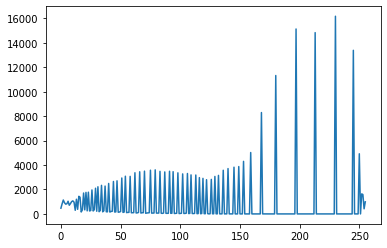

In [42]:
# Increasing Contrast with Histograms Equalization
img_yuv = cv2.cvtColor(imgLC, cv2.COLOR_RGB2HSV)
# equalize the histogram of the Y channel
img_yuv[:,:,2] = cv2.equalizeHist(img_yuv[:,:,2])
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_HSV2RGB)

plt.imshow(img_output)
plt.title('Histograms Equalization')
plt.axis('off')
plt.show()

histg = cv2.calcHist([img_output],[0],None,[256],[0,256]) 

plt.plot(histg)
plt.show()

